In [23]:
import sys
sys.path.append('../../astro_tools')
sys.path.append('../')
from astropy.io import fits
from astropy.wcs import wcs
from astropy import units as u
from spectral_cube import SpectralCube
from tqdm import tqdm
import cmasher as cmr
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

import numpy as np
import routine

Afont = {
        'family' : 'courier new',
        'color':  'black',
        'size': 25,
        }

In [3]:
def get_offset(dat, w):
    
    center_pix = w.pixel_to_world(dat.shape[1]//2, dat.shape[0]//2)
    
    ra_hr = center_pix.ra.hms[0]
    ra_min = center_pix.ra.hms[1]
    ra_sec = center_pix.ra.hms[2]
    ra_hms = '%s$^{h}$%s$^{m}$%s$^{s}$' % (int(ra_hr), int(ra_min), np.round(ra_sec,2))
    
    dec_deg = center_pix.dec.dms[0]
    dec_min = center_pix.dec.dms[1]
    dec_sec = center_pix.dec.dms[2]
    dec_dms = "%s$^{o}$%s'%s$''$" % (int(dec_deg), int(np.abs(dec_min)), np.round(np.abs(dec_sec),2))

    return(ra_hms, dec_dms)

In [4]:
c = 3*10**5 * u.km/u.s
Vsys = 243. * u.km/u.s

In [60]:
cube = routine.CreateCube('../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits', 
           4800, 5000, 4800, 4820, 4900, 5000)
restwvl = 4861.363*u.AA * (Vsys + c)/c # H-beta
hbeta_sub = cube.spectral_slab(4855*u.AA, 4875*u.AA) 

# cube[:,250,250].quicklook()
hb = np.max(hbeta_sub[:,250,250]).value

cube = routine.CreateCube('../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits', 
           6500, 6800, 6525, 6620, 6700, 6750)
restwvl = 6562.801*u.AA * (Vsys + c)/c # H-alpha
halpha_sub = cube.spectral_slab(6555*u.AA, 6575*u.AA)
ha = np.max(halpha_sub[:,250,250]).value

print(hb, ha)
print(hb/ha)
print(ha/hb)

90.49722 509.9206
0.17747317
5.6346545


Get Hbeta and Halpha peak spectral densities, then take the ratio and save to a fits file.

In [73]:
# ----------------------------------------------------
cube = routine.CreateCube('../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits', 
           4800, 5100, 4800, 4845, 4890, 4940)
restwvl = 4861.363*u.AA * (Vsys + c)/c # H-beta
subcube = cube.with_spectral_unit(u.km/u.s, 'optical', restwvl).spectral_slab(-1000*u.km/u.s, 1000*u.km/u.s)  

hbeta = np.full((subcube.shape[1],subcube.shape[2]), np.nan)
pbar = tqdm(total=subcube.shape[2]*subcube.shape[1])
for i in np.arange(subcube.shape[2]): # x-axis
    for j in np.arange(subcube.shape[1]): # y-axis
        hbeta[j,i] = np.max(subcube[:,j,i]).value
        pbar.update(1)
        
# ----------------------------------------------------
cube = routine.CreateCube('../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits', 
           6500, 6800, 6525, 6620, 6700, 6750)
restwvl = 6562.801*u.AA * (Vsys + c)/c # H-alpha
subcube = cube.spectral_slab(6555*u.AA, 6575*u.AA)  

halpha = np.full((subcube.shape[1],subcube.shape[2]), np.nan)
pbar = tqdm(total=subcube.shape[2]*subcube.shape[1])
for i in np.arange(subcube.shape[2]): # x-axis
    for j in np.arange(subcube.shape[1]): # y-axis
        halpha[j,i] = np.max(subcube[:,j,i]).value
        pbar.update(1)
        
rat = hbeta/halpha
hdul = fits.PrimaryHDU(data=rat)
hdul.writeto('../../ngc253/muse/data/hbeta_halpha_intens_se.fits', overwrite=True) 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190532/190532 [05:46<00:00, 550.64it/s]

  1%|█▊                                                                                                                                           | 2503/190532 [00:04<05:03, 619.24it/s]


  3%|███▊                                                                                                                                         | 5236/190532 [00:08<04:57, 622.51it/s]


  4%|█████▊                                                                                                                                       | 7927/190532 [00:12<05:01, 606.39it/s]


  6%|███████▊                                                                                                                                    | 10649/190532 [00:17<04:49, 622.35it/s]


  7%|█████████▊                                                                                                                                  | 13324/190532 [00:21<04:45, 621.77it/s]


  8%|███████████▊                                                                                                                                | 16006/190532 [00:26<04:45, 611.55it/s]


 10%|█████████████▋                                                                                                                              | 18663/190532 [00:30<04:50, 592.24it/s]


 11%|███████████████▋                                                                                                                            | 21383/190532 [00:34<04:32, 619.92it/s]


 13%|█████████████████▋                                                                                                                          | 24077/190532 [00:39<04:23, 630.89it/s]


 14%|███████████████████▋                                                                                                                        | 26829/190532 [00:43<04:17, 636.82it/s]


 15%|█████████████████████▋                                                                                                                      | 29488/190532 [00:48<04:22, 614.12it/s]


 17%|███████████████████████▋                                                                                                                    | 32180/190532 [00:52<04:24, 599.12it/s]


 18%|█████████████████████████▌                                                                                                                  | 34796/190532 [00:56<04:20, 597.74it/s]


 20%|███████████████████████████▍                                                                                                                | 37411/190532 [01:01<04:07, 618.89it/s]


 21%|█████████████████████████████▍                                                                                                              | 39986/190532 [01:06<04:34, 547.84it/s]


 22%|███████████████████████████████▍                                                                                                            | 42708/190532 [01:10<03:57, 623.15it/s]


 24%|█████████████████████████████████▍                                                                                                          | 45450/190532 [01:14<03:50, 630.62it/s]


 25%|███████████████████████████████████▍                                                                                                        | 48205/190532 [01:19<03:47, 625.26it/s]


 27%|█████████████████████████████████████▍                                                                                                      | 50954/190532 [01:23<03:41, 631.24it/s]


 28%|███████████████████████████████████████▍                                                                                                    | 53692/190532 [01:28<03:41, 617.59it/s]


 30%|█████████████████████████████████████████▍                                                                                                  | 56398/190532 [01:32<03:34, 625.64it/s]


 31%|███████████████████████████████████████████▍                                                                                                | 59142/190532 [01:36<03:29, 626.87it/s]


 32%|█████████████████████████████████████████████▍                                                                                              | 61839/190532 [01:41<03:23, 631.19it/s]


 34%|███████████████████████████████████████████████▍                                                                                            | 64554/190532 [01:45<03:20, 626.91it/s]


 35%|█████████████████████████████████████████████████▍                                                                                          | 67277/190532 [01:50<03:17, 624.62it/s]


 37%|███████████████████████████████████████████████████▍                                                                                        | 70023/190532 [01:54<03:11, 630.08it/s]


 38%|█████████████████████████████████████████████████████▍                                                                                      | 72764/190532 [01:58<03:06, 632.37it/s]


 40%|███████████████████████████████████████████████████████▍                                                                                    | 75512/190532 [02:03<03:04, 623.99it/s]


 41%|█████████████████████████████████████████████████████████▍                                                                                  | 78254/190532 [02:07<02:59, 625.45it/s]


 42%|███████████████████████████████████████████████████████████▍                                                                                | 80952/190532 [02:12<02:59, 610.35it/s]


 44%|█████████████████████████████████████████████████████████████▍                                                                              | 83697/190532 [02:16<02:51, 622.83it/s]


 45%|███████████████████████████████████████████████████████████████▍                                                                            | 86401/190532 [02:20<03:05, 561.52it/s]


 47%|█████████████████████████████████████████████████████████████████▍                                                                          | 89126/190532 [02:25<02:42, 625.47it/s]


 48%|███████████████████████████████████████████████████████████████████▌                                                                        | 91866/190532 [02:29<02:43, 604.90it/s]


 50%|█████████████████████████████████████████████████████████████████████▍                                                                      | 94543/190532 [02:34<03:58, 403.00it/s]


 51%|███████████████████████████████████████████████████████████████████████▍                                                                    | 97218/190532 [02:38<02:28, 629.21it/s]


 52%|█████████████████████████████████████████████████████████████████████████▍                                                                  | 99975/190532 [02:43<02:24, 627.40it/s]


 54%|██████████████████████████████████████████████████████████████████████████▉                                                                | 102721/190532 [02:47<02:20, 626.47it/s]


 55%|████████████████████████████████████████████████████████████████████████████▉                                                              | 105473/190532 [02:51<02:15, 626.12it/s]


 57%|██████████████████████████████████████████████████████████████████████████████▉                                                            | 108229/190532 [02:56<02:10, 631.76it/s]


 58%|████████████████████████████████████████████████████████████████████████████████▉                                                          | 110957/190532 [03:00<02:07, 623.45it/s]


 60%|██████████████████████████████████████████████████████████████████████████████████▉                                                        | 113673/190532 [03:05<02:02, 626.08it/s]


 61%|████████████████████████████████████████████████████████████████████████████████████▉                                                      | 116368/190532 [03:09<02:00, 615.42it/s]


 63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                    | 119108/190532 [03:13<01:54, 624.10it/s]


 64%|████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 121857/190532 [03:18<01:49, 626.43it/s]


 65%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                | 124600/190532 [03:22<01:44, 630.72it/s]


 67%|████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 127338/190532 [03:26<01:40, 628.33it/s]


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 130089/190532 [03:31<01:36, 623.22it/s]


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 132834/190532 [03:35<01:32, 624.86it/s]


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 135575/190532 [03:40<01:27, 626.54it/s]


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 138323/190532 [03:44<01:23, 625.32it/s]


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 141067/190532 [03:48<01:24, 587.53it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 143795/190532 [03:53<01:16, 614.82it/s]


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 146527/190532 [03:57<01:10, 622.97it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 149268/190532 [04:01<01:05, 627.87it/s]


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 152013/190532 [04:06<01:01, 626.75it/s]


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 154744/190532 [04:10<00:57, 622.80it/s]


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 157487/190532 [04:15<00:52, 626.20it/s]


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 160228/190532 [04:19<00:48, 625.86it/s]


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 162977/190532 [04:23<00:43, 629.15it/s]


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 165720/190532 [04:28<00:39, 626.34it/s]


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 168468/190532 [04:32<00:36, 610.07it/s]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 171216/190532 [04:36<00:30, 627.09it/s]


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 173965/190532 [04:41<00:26, 618.26it/s]


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 176697/190532 [04:45<00:22, 623.70it/s]


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 179428/190532 [04:49<00:18, 603.65it/s]


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 182141/190532 [04:54<00:13, 627.38it/s]


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 184866/190532 [04:58<00:09, 621.70it/s]


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 187592/190532 [05:03<00:04, 622.24it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 190328/190532 [05:07<00:00, 625.82it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 190518/190532 [05:07<00:00, 620.71it/s]

In [74]:
# ----------------------------------------------------
cube = routine.CreateCube('../../ngc253/muse/data/ADP.2019-08-24T09_53_08.548.fits', 
           4800, 5100, 4800, 4845, 4890, 4940)
restwvl = 4861.363*u.AA * (Vsys + c)/c # H-beta
subcube = cube.with_spectral_unit(u.km/u.s, 'optical', restwvl).spectral_slab(-1000*u.km/u.s, 1000*u.km/u.s)  

hbeta = np.full((subcube.shape[1],subcube.shape[2]), np.nan)
pbar = tqdm(total=subcube.shape[2]*subcube.shape[1])
for i in np.arange(subcube.shape[2]): # x-axis
    for j in np.arange(subcube.shape[1]): # y-axis
        hbeta[j,i] = np.max(subcube[:,j,i]).value
        pbar.update(1)
        
# ----------------------------------------------------
cube = routine.CreateCube('../../ngc253/muse/data/ADP.2019-08-24T09_53_08.548.fits', 
           6500, 6800, 6525, 6620, 6700, 6750)
restwvl = 6562.801*u.AA * (Vsys + c)/c # H-alpha
subcube = cube.spectral_slab(6555*u.AA, 6575*u.AA)  

halpha = np.full((subcube.shape[1],subcube.shape[2]), np.nan)
pbar = tqdm(total=subcube.shape[2]*subcube.shape[1])
for i in np.arange(subcube.shape[2]): # x-axis
    for j in np.arange(subcube.shape[1]): # y-axis
        halpha[j,i] = np.max(subcube[:,j,i]).value
        pbar.update(1)
        
rat = hbeta/halpha
hdul = fits.PrimaryHDU(data=rat)
hdul.writeto('../../ngc253/muse/data/hbeta_halpha_intens_nw.fits', overwrite=True) 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188784/188784 [06:03<00:00, 519.31it/s]

  1%|█▊                                                                                                                                           | 2481/188784 [00:04<05:13, 594.88it/s]


  3%|███▊                                                                                                                                         | 5131/188784 [00:08<05:01, 608.58it/s]


  4%|█████▊                                                                                                                                       | 7737/188784 [00:13<04:56, 609.81it/s]


  5%|███████▋                                                                                                                                    | 10283/188784 [00:17<05:45, 516.70it/s]


  7%|█████████▌                                                                                                                                  | 12850/188784 [00:22<04:58, 589.93it/s]


  8%|███████████▍                                                                                                                                | 15501/188784 [00:26<04:45, 607.07it/s]


 10%|█████████████▍                                                                                                                              | 18106/188784 [00:30<04:44, 599.03it/s]


 11%|███████████████▍                                                                                                                            | 20734/188784 [00:35<05:25, 516.98it/s]


 12%|█████████████████▏                                                                                                                          | 23183/188784 [00:39<04:56, 558.94it/s]


 14%|███████████████████▏                                                                                                                        | 25796/188784 [00:44<04:23, 619.49it/s]


 15%|█████████████████████                                                                                                                       | 28455/188784 [00:48<04:59, 535.32it/s]


 16%|███████████████████████                                                                                                                     | 31110/188784 [00:53<04:18, 609.18it/s]


 18%|████████████████████████▉                                                                                                                   | 33665/188784 [00:57<04:17, 602.74it/s]


 19%|██████████████████████████▉                                                                                                                 | 36300/188784 [01:02<04:17, 592.95it/s]


 21%|████████████████████████████▉                                                                                                               | 38972/188784 [01:06<04:05, 610.65it/s]


 22%|██████████████████████████████▉                                                                                                             | 41639/188784 [01:10<04:00, 612.29it/s]


 23%|████████████████████████████████▊                                                                                                           | 44286/188784 [01:15<04:03, 593.65it/s]


 25%|██████████████████████████████████▊                                                                                                         | 46921/188784 [01:19<04:00, 590.05it/s]


 26%|████████████████████████████████████▋                                                                                                       | 49464/188784 [01:24<04:02, 573.48it/s]


 27%|██████████████████████████████████████▍                                                                                                     | 51791/188784 [01:28<03:53, 586.06it/s]


 29%|████████████████████████████████████████▍                                                                                                   | 54447/188784 [01:33<03:35, 622.65it/s]


 30%|██████████████████████████████████████████▎                                                                                                 | 57066/188784 [01:37<03:43, 589.82it/s]


 32%|████████████████████████████████████████████▎                                                                                               | 59734/188784 [01:41<03:30, 613.92it/s]


 33%|██████████████████████████████████████████████▏                                                                                             | 62307/188784 [01:46<03:39, 576.30it/s]


 34%|████████████████████████████████████████████████                                                                                            | 64884/188784 [01:50<03:39, 563.73it/s]


 36%|██████████████████████████████████████████████████                                                                                          | 67545/188784 [01:55<03:21, 600.44it/s]


 37%|████████████████████████████████████████████████████                                                                                        | 70192/188784 [01:59<03:15, 607.03it/s]


 39%|██████████████████████████████████████████████████████                                                                                      | 72860/188784 [02:04<03:10, 608.90it/s]


 40%|████████████████████████████████████████████████████████                                                                                    | 75523/188784 [02:08<03:07, 605.13it/s]


 41%|█████████████████████████████████████████████████████████▉                                                                                  | 78119/188784 [02:12<03:03, 603.82it/s]


 43%|███████████████████████████████████████████████████████████▉                                                                                | 80769/188784 [02:17<02:53, 621.24it/s]


 44%|█████████████████████████████████████████████████████████████▉                                                                              | 83486/188784 [02:21<02:53, 605.19it/s]


 46%|███████████████████████████████████████████████████████████████▊                                                                            | 86129/188784 [02:26<02:52, 593.71it/s]


 47%|█████████████████████████████████████████████████████████████████▊                                                                          | 88774/188784 [02:30<02:48, 592.37it/s]


 48%|███████████████████████████████████████████████████████████████████▊                                                                        | 91442/188784 [02:35<02:41, 601.11it/s]


 50%|█████████████████████████████████████████████████████████████████████▊                                                                      | 94075/188784 [02:39<02:43, 578.29it/s]


 51%|███████████████████████████████████████████████████████████████████████▋                                                                    | 96719/188784 [02:43<02:36, 586.68it/s]


 53%|█████████████████████████████████████████████████████████████████████████▋                                                                  | 99402/188784 [02:48<02:27, 605.25it/s]


 54%|███████████████████████████████████████████████████████████████████████████▏                                                               | 102103/188784 [02:52<02:27, 587.64it/s]


 56%|█████████████████████████████████████████████████████████████████████████████▏                                                             | 104784/188784 [02:57<02:18, 604.88it/s]


 57%|███████████████████████████████████████████████████████████████████████████████▏                                                           | 107483/188784 [03:01<02:12, 614.59it/s]


 58%|█████████████████████████████████████████████████████████████████████████████████                                                          | 110173/188784 [03:05<02:09, 608.66it/s]


 60%|███████████████████████████████████████████████████████████████████████████████████                                                        | 112845/188784 [03:10<02:05, 606.14it/s]


 61%|█████████████████████████████████████████████████████████████████████████████████████                                                      | 115516/188784 [03:14<02:00, 607.78it/s]


 63%|███████████████████████████████████████████████████████████████████████████████████████                                                    | 118192/188784 [03:19<01:54, 617.10it/s]


 64%|█████████████████████████████████████████████████████████████████████████████████████████                                                  | 120880/188784 [03:23<01:49, 621.56it/s]


 65%|███████████████████████████████████████████████████████████████████████████████████████████                                                | 123610/188784 [03:27<01:46, 612.28it/s]


 67%|█████████████████████████████████████████████████████████████████████████████████████████████                                              | 126327/188784 [03:32<01:41, 613.87it/s]


 68%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 128982/188784 [03:36<01:41, 586.91it/s]


 70%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 131682/188784 [03:41<01:35, 596.67it/s]


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 134236/188784 [03:45<01:31, 593.23it/s]


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 136881/188784 [03:50<01:26, 600.49it/s]


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 139550/188784 [03:54<01:20, 610.36it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 142232/188784 [03:58<01:17, 603.34it/s]


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 144874/188784 [04:03<01:09, 627.48it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 147614/188784 [04:07<01:06, 621.70it/s]


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 150321/188784 [04:12<01:02, 614.07it/s]


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 152948/188784 [04:16<01:00, 590.32it/s]


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 155560/188784 [04:20<00:56, 593.06it/s]


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 158190/188784 [04:25<00:51, 594.45it/s]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 160832/188784 [04:29<00:46, 603.23it/s]


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 163499/188784 [04:34<00:41, 611.17it/s]


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 166134/188784 [04:38<00:39, 571.42it/s]


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 168781/188784 [04:42<00:33, 597.85it/s]


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 171431/188784 [04:47<00:29, 587.83it/s]


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 174058/188784 [04:51<00:25, 586.88it/s]


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 176716/188784 [04:56<00:20, 592.80it/s]


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 179363/188784 [05:00<00:15, 597.06it/s]


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 181951/188784 [05:05<00:11, 592.34it/s]


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 184593/188784 [05:09<00:07, 583.73it/s]


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 187239/188784 [05:14<00:02, 597.65it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 188767/188784 [05:16<00:00, 602.99it/s]

Plot the ratios.

In [75]:
NIIfilename = '../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits'
NII = fits.open(NIIfilename)[1]

ra_hms, dec_dms = get_offset(NII.data, wcs.WCS(NII.header, naxis=2).celestial)
pixscale = 0.2  # arcsec
x_lower = -(NII.shape[2]*pixscale)//2
x_upper = (NII.shape[2]*pixscale)//2
y_lower = -(NII.shape[1]*pixscale)//2
y_upper = (NII.shape[1]*pixscale)//2
extent=[x_lower,x_upper, y_lower,y_upper]

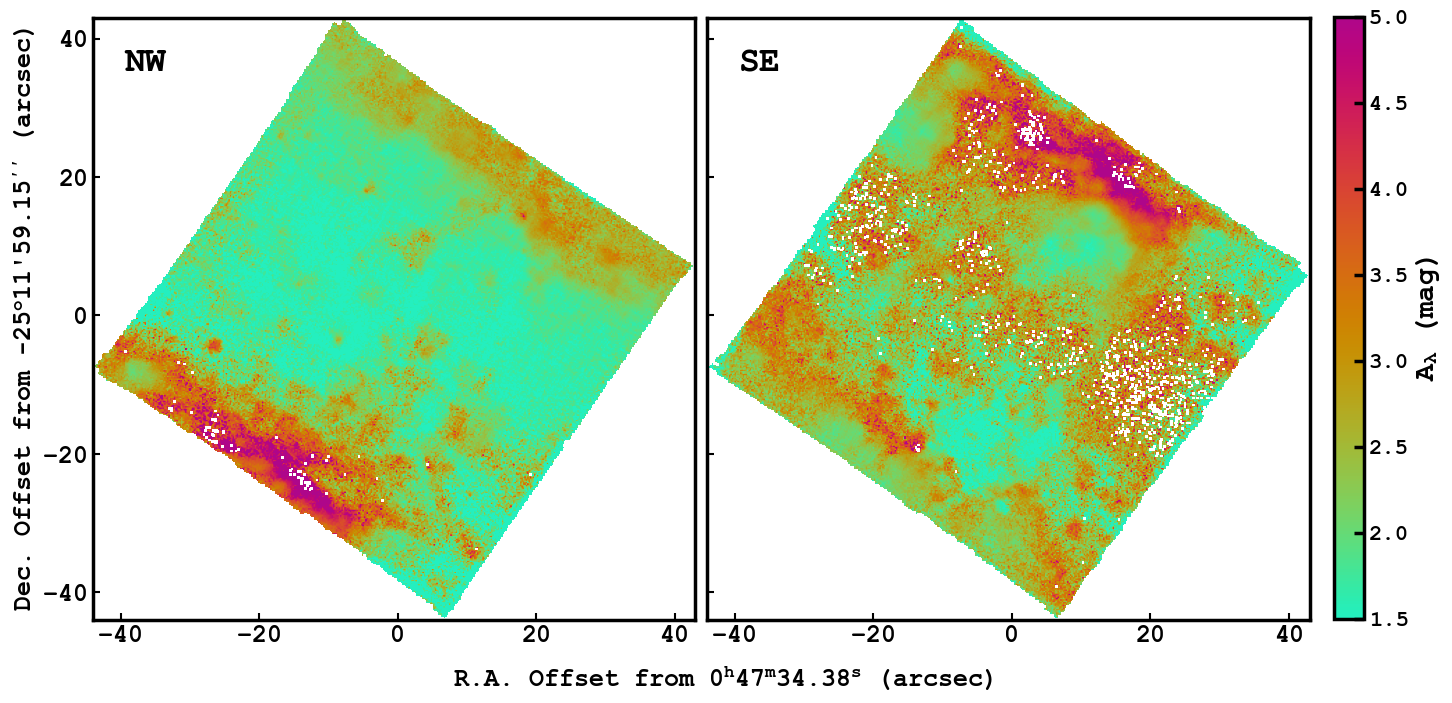

In [83]:
# read in data
rat_file_se = fits.open('../../ngc253/muse/data/hbeta_halpha_intens_se.fits')
rat_3D_se = np.empty((1,rat_file_se[0].data.shape[0],rat_file_se[0].data.shape[1]))
rat_3D_se[:,:,:] = rat_file_se[0].data

rat_file_nw = fits.open('../../ngc253/muse/data/hbeta_halpha_intens_nw.fits')
rat_3D_nw = np.empty((1,rat_file_nw[0].data.shape[0],rat_file_nw[0].data.shape[1]))
rat_3D_nw[:,:,:] = rat_file_nw[0].data

# set plot parameters
cmap = cmr.get_sub_cmap('cmr.tropical_r', 0.1, 0.90)
vmin=1.5
vmax=5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7), sharex=True, sharey=True)

# ============================================================================================================
im = ax1.imshow(2.5*np.log10(1/rat_file_nw[0].data), origin='lower', vmin=vmin, vmax=vmax, cmap=cmap, extent=extent)
ax1.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=18, length=5, color='black')
ax1.set_xticks([-40, -20, 0, 20, 40])
ax1.set_yticks([-40, -20, 0, 20, 40])
ax1.set_ylabel('Dec. Offset from %s (arcsec)' % dec_dms, fontsize=18)

at = AnchoredText('NW', prop=Afont, frameon=False, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

# ============================================================================================================

im = ax2.imshow(2.5*np.log10(1/rat_file_se[0].data), origin='lower', vmin=vmin, vmax=vmax, cmap=cmap, extent=extent)
ax2.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=18, length=5, color='black')
ax2.set_xticks([-40, -20, 0, 20, 40])
# ax2.set_yticks([-40, -20, 0, 20, 40])

at = AnchoredText('SE', prop=Afont, frameon=False, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)

cax = ax2.inset_axes([1.04, 0.002, 0.05, 1])  # make another axis for the colorbar 
                                                 # [x0, y0, width, height] where x0, y0 = lower left corner
bar = fig.colorbar(im, ax=ax2, cax=cax)
bar.set_label(r'A$_{\lambda}$ (mag)', fontsize=20)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')

# ============================================================================================================
fig.supxlabel('R.A. Offset from %s (arcsec)' % ra_hms, fontsize=18, family='courier new', weight='bold', style='normal')
# fig.supylabel('Dec. Offset from %s (arcsec)' % dec_dms, fontsize=18, family='courier new', weight='bold', style='normal')
plt.tight_layout()
plt.subplots_adjust(wspace=-0.05, hspace=0)
plt.savefig('../../ngc253/muse/visuals/full_extinction.png', bbox_inches='tight', dpi=200)
plt.savefig('../../ngc253/muse/visuals/full_extinction.pdf', bbox_inches='tight', dpi=200)
plt.show()

In [ ]:
rat_file_

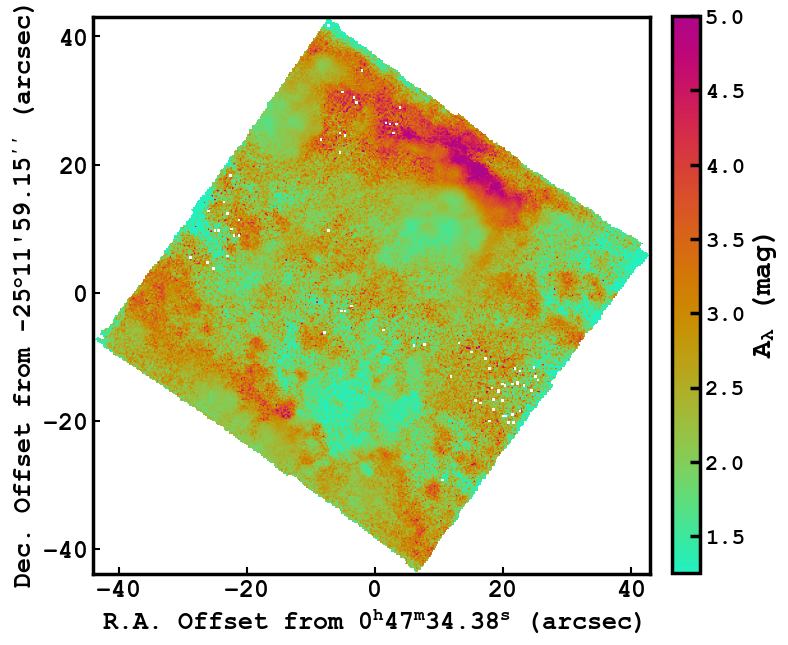

In [27]:
# read in data
rat_file = fits.open('../../ngc253/muse/data/hbeta_halpha_intens.fits')
rat_3D = np.empty((1,rat_file[0].data.shape[0],rat_file[0].data.shape[1]))
rat_3D[:,:,:] = rat_file[0].data

# set plot parameters
cmap = cmr.get_sub_cmap('cmr.tropical_r', 0.1, 0.90)
vmin=0.5
vmax=2
fig, (ax1) = plt.subplots(1, 1, figsize=(8,8))

im = ax1.imshow(2.5*np.log10(1/rat_file[0].data), origin='lower', vmin=vmin*2.5, vmax=vmax*2.5, cmap=cmap, extent=extent)
ax1.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=18, length=5, color='black')
ax1.set_xticks([-40, -20, 0, 20, 40])
ax1.set_yticks([-40, -20, 0, 20, 40])
ax1.set_xlabel('R.A. Offset from %s (arcsec)' % ra_hms, fontsize=18, family='courier new', weight='bold', style='normal')
ax1.set_ylabel('Dec. Offset from %s (arcsec)' % dec_dms, fontsize=18, family='courier new', weight='bold', style='normal')

cax = ax1.inset_axes([1.04, 0.002, 0.05, 1])  # make another axis for the colorbar 
                                                 # [x0, y0, width, height] where x0, y0 = lower left corner
bar = fig.colorbar(im, ax=ax1, cax=cax)
bar.set_label(r'A$_{\lambda}$ (mag)', fontsize=20)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')

# ============================================================================================================
# fig.supxlabel('R.A. Offset from %s (arcsec)' % ra_hms, fontsize=18, family='courier new', weight='bold', style='normal')
# fig.supylabel('Dec. Offset from %s (arcsec)' % dec_dms, fontsize=18, family='courier new', weight='bold', style='normal')
# plt.subplots_adjust(wspace=-2)
plt.tight_layout()
# plt.savefig('../../ngc253/muse/visuals/se_extinction.png', bbox_inches='tight', dpi=200)
# plt.savefig('../../ngc253/muse/visuals/se_extinction.pdf', bbox_inches='tight', dpi=200)
plt.show()